In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [30]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
plt.rcParams['axes.facecolor'] = 'white'

In [31]:
steam = pd.read_csv("Cleaned Data/clean_data.csv")
df = steam.copy()

In [32]:
steam.head()

,name,required_age,is_free,short_description,developers,platforms,achievements,release_date,positive,negative,owners,average_forever,median_forever,languages,tags
0,Counter-Strike,0.0,False,Play the world's number 1 online action game. ...,['Valve'],"{'windows': True, 'mac': True, 'linux': True}",{'total': 0},"{'coming_soon': False, 'date': '1 Nov, 2000'}",124534,3339,10000000-20000000,17612,317,"English, French, German, Italian, Spanish - Sp...",Action;FPS;Multiplayer
1,Team Fortress Classic,0.0,False,One of the most popular online action games of...,['Valve'],"{'windows': True, 'mac': True, 'linux': True}",{'total': 0},"{'coming_soon': False, 'date': '1 Apr, 1999'}",3318,633,5000000-10000000,277,62,"English, French, German, Italian, Spanish - Sp...",Action;FPS;Multiplayer
2,Day of Defeat,0.0,False,Enlist in an intense brand of Axis vs. Allied ...,['Valve'],"{'windows': True, 'mac': True, 'linux': True}",{'total': 0},"{'coming_soon': False, 'date': '1 May, 2003'}",3416,398,5000000-10000000,187,34,"English, French, German, Italian, Spanish - Spain",FPS;World War II;Multiplayer
3,Deathmatch Classic,0.0,False,Enjoy fast-paced multiplayer gaming with Death...,['Valve'],"{'windows': True, 'mac': True, 'linux': True}",{'total': 0},"{'coming_soon': False, 'date': '1 Jun, 2001'}",1273,267,5000000-10000000,258,184,"English, French, German, Italian, Spanish - Sp...",Action;FPS;Multiplayer
4,Half-Life: Opposing Force,0.0,False,Return to the Black Mesa Research Facility as ...,['Gearbox Software'],"{'windows': True, 'mac': True, 'linux': True}",{'total': 0},"{'coming_soon': False, 'date': '1 Nov, 1999'}",5250,288,5000000-10000000,624,415,"English, French, German, Korean",FPS;Action;Sci-fi


In [33]:
from wordcloud import WordCloud, STOPWORDS

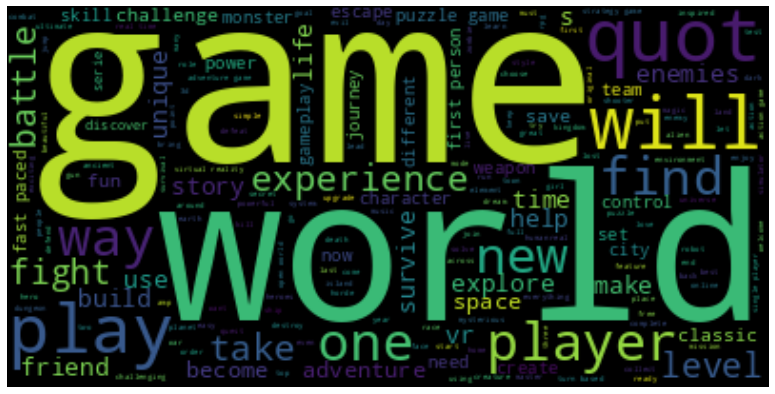

In [34]:
#filter the df to one candidate, and create a list of responses from them
text = steam.short_description.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text)

#plot the wordcloud object
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

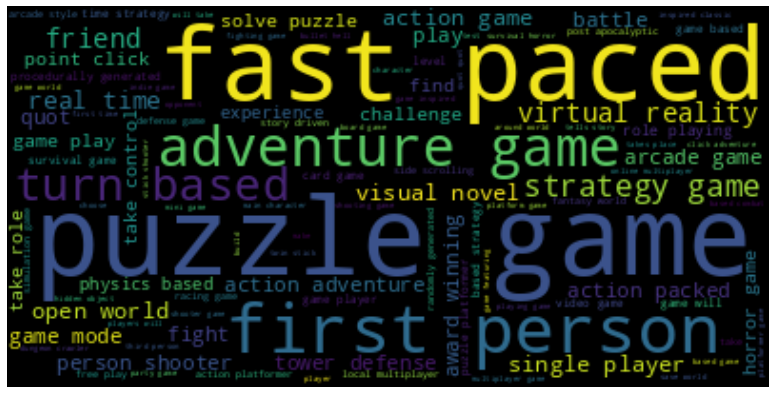

In [35]:
#filter the df to one candidate, and create a list of responses from them
text = steam.short_description.tolist()
# join the list and lowercase all the words
text = ' '.join(text).lower()
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                        collocations=True,
                        min_word_length =4,
                        collocation_threshold=3).generate(text)

text1_dict = dict(
    sorted(
        wordcloud.process_text(text).items(),
        reverse=True,
        key=lambda item: item[1],
    )
)

plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [36]:
steam["is_free"] = steam["is_free"].astype(int)

In [37]:
steam["is_free"] = steam["is_free"].replace([1, 0], ['Free to Play', 'Pay to Play'])

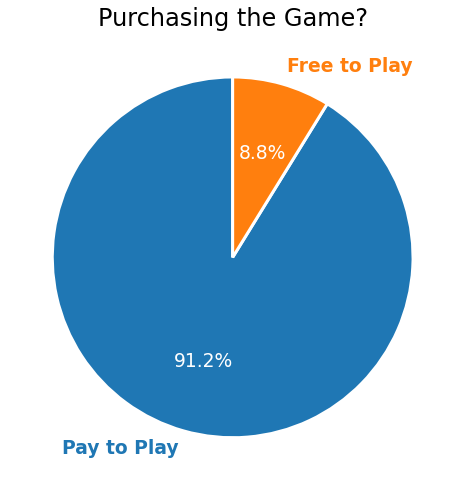

In [38]:
fig, ax = plt.subplots(figsize=(14, 7))

s = steam["is_free"].value_counts()

patches, texts, pcts = ax.pie(s, labels=s.index, autopct='%.1f%%',
                                wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
                                textprops={'size': 'x-large'},
                                startangle=90)

# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)

ax.title.set_color('black')

ax.set_title('Purchasing the Game?', fontsize=24)

plt.tight_layout()
plt.show()


In [39]:
steam['bool_age'] = steam["required_age"].astype('bool')

In [40]:
steam['bool_age'] = steam['bool_age'].astype(int)
steam['bool_age'] = steam['bool_age'].replace([1, 0], ['Age Restricted', 'No Age Restriction'])

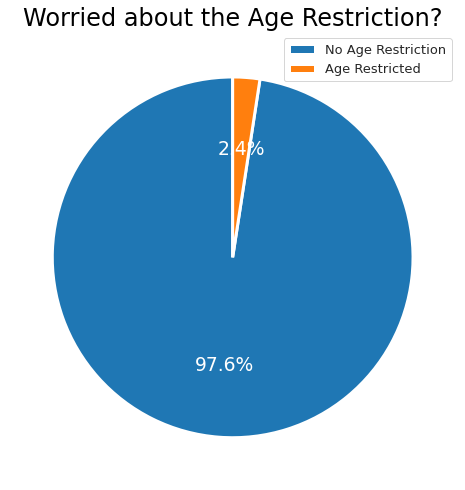

In [41]:
fig, ax = plt.subplots(figsize=(14, 7))

s = steam['bool_age'].value_counts()

patches, texts, pcts = ax.pie(s, autopct='%.1f%%',
                                wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
                                textprops={'size': 'x-large'},
                                startangle=90)

# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())

ax.yaxis.set_visible(False)

plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)

plt.legend(patches, s.index, loc="best")

ax.title.set_color('black')

ax.set_title('Worried about the Age Restriction?', fontsize=24)

plt.tight_layout()
plt.show()

In [42]:
steam.developers = steam.developers.str[2:-2]

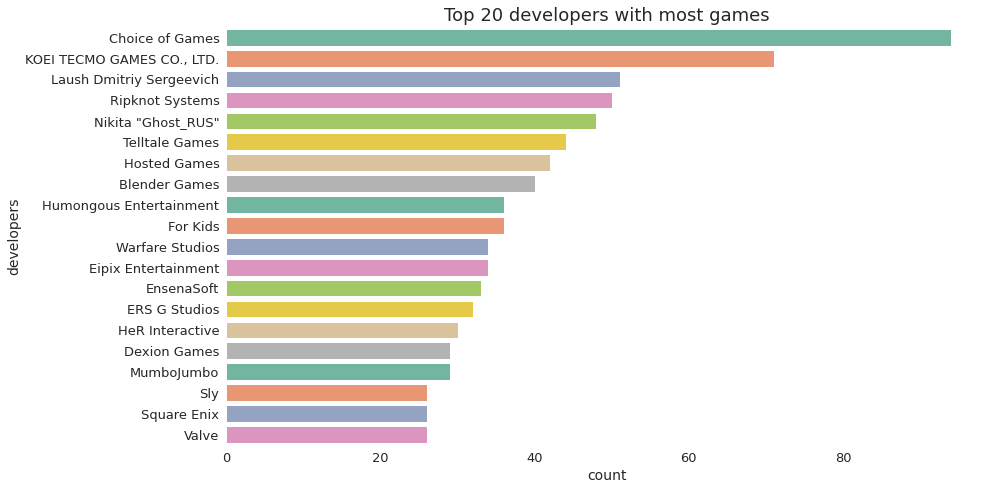

In [43]:
plt.figure(figsize=(14, 7), tight_layout=True)
top = 20
plt.title(f'Top {top} developers with most games')

g = sns.countplot(y="developers", data=steam, order=steam.developers.value_counts().iloc[:top].index, palette='Set2')
plt.show()

In [44]:
steam["English"] = steam["languages"].str.contains("english", case=False, na=False).astype(int)

In [45]:
steam["English"].value_counts()

1    25704
0      253
Name: English, dtype: int64

In [46]:
steam["platforms"].value_counts()

{'windows': True, 'mac': False, 'linux': False}    17352
{'windows': True, 'mac': True, 'linux': True}       4611
{'windows': True, 'mac': True, 'linux': False}      3388
{'windows': True, 'mac': False, 'linux': True}       601
{'windows': False, 'mac': True, 'linux': False}        3
{'windows': False, 'mac': True, 'linux': True}         1
{'windows': False, 'mac': False, 'linux': True}        1
Name: platforms, dtype: int64

In [47]:
steam["All"] = steam["platforms"].str.contains("{'windows': True, 'mac': True, 'linux': True}", case=False, na=False).astype(int)
steam["Windows"] = steam["platforms"].str.contains("{'windows': True, 'mac': False, 'linux': False}", case=False, na=False).astype(int)
steam["Windows_mac"] = steam["platforms"].str.contains("{'windows': True, 'mac': True, 'linux': False}", case=False, na=False).astype(int)
steam["Linux_Windows"] = steam["platforms"].str.contains("{'windows': True, 'mac': False, 'linux': True}", case=False, na=False).astype(int)
steam["Mac"] = steam["platforms"].str.contains("{'windows': False, 'mac': True, 'linux': False}", case=False, na=False).astype(int)
steam["Mac_Linux"] = steam["platforms"].str.contains("{'windows': False, 'mac': True, 'linux': True} ", case=False, na=False).astype(int)
steam["Linux"] = steam["platforms"].str.contains("{'windows': False, 'mac': False, 'linux': True}", case=False, na=False).astype(int)


In [48]:
all = steam["All"].value_counts()[1]
Windows = steam["Windows"].value_counts()[1]
Windows_mac = steam["Windows_mac"].value_counts()[1]
Linux_Windows = steam["Linux_Windows"].value_counts()[1]
Mac = steam["Mac"].value_counts()[1]
Linux = steam["Linux"].value_counts()[1]

In [49]:
Mac_Linux= steam["Mac_Linux"].value_counts()

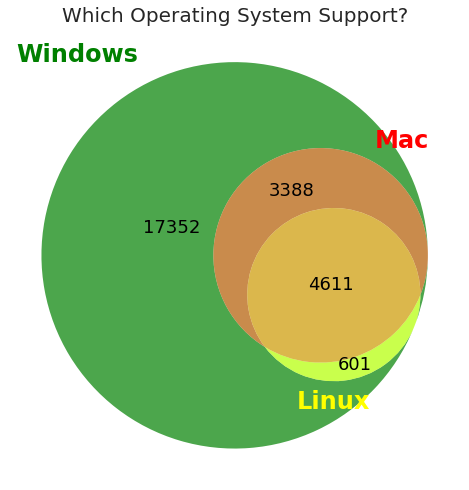

In [50]:
from matplotlib_venn import venn3,venn3_circles

plt.figure(figsize=(14, 7), tight_layout=True)

sets = (Windows, 0, Windows_mac, 0, Linux_Windows, 0, all)
labels = ('Windows', 'Mac', 'Linux')

# depict venn diagram
ax = plt.gca()

colors = ['green', 'red', 'yellow']

v = venn3(subsets=sets, set_labels=labels, ax=ax, set_colors=colors, alpha=0.7)


for i, text in enumerate(v.set_labels):
    text.set_color(colors[i])
    text.set_fontsize(24)
    text.set_fontweight('bold')

for text in v.subset_labels:
    if text is not None:
        text.set_color('black')
        text.set_fontsize(18)

# title of the venn diagram
plt.title("Which Operating System Support?", fontsize=20)
plt.show()


In [51]:
steam['owners'].value_counts()

0-20000               17267
20000-50000            3074
50000-100000           1730
100000-200000          1433
200000-500000          1328
500000-1000000          535
1000000-2000000         308
2000000-5000000         206
5000000-10000000         49
10000000-20000000        22
20000000-50000000         3
50000000-100000000        2
Name: owners, dtype: int64

In [52]:
mask = steam['owners'].isin(['10000000-20000000', '20000000-50000000', '50000000-100000000', '100000000-200000000'])
steam.loc[mask, 'owners'] = '10mil and more'

In [53]:
steam.loc[steam['owners'] == '5000000-10000000', 'owners'] = '5mil-10mil'
steam.loc[steam['owners'] == '2000000-5000000', 'owners'] = '2mil-5mil'
steam.loc[steam['owners'] == '1000000-2000000', 'owners'] = '1mil-2mil'
steam.loc[steam['owners'] == '500000-1000000', 'owners'] = '500k-1mil'
steam.loc[steam['owners'] == '200000-500000', 'owners'] = '200k-500k'
steam.loc[steam['owners'] == '100000-200000', 'owners'] = '100k-200k'
steam.loc[steam['owners'] == '50000-100000', 'owners'] = '50k-100k'
steam.loc[steam['owners'] == '20000-50000', 'owners'] = '20k-50k'
steam.loc[steam['owners'] == '0-20000', 'owners'] = '20k or less'

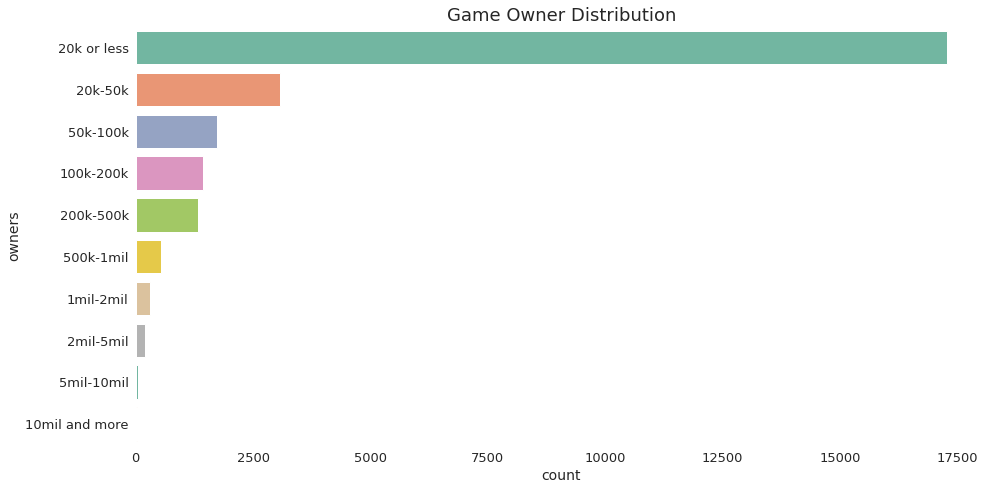

In [54]:
plt.figure(figsize=(14, 7), tight_layout=True)
plt.title('Game Owner Distribution')

g = sns.countplot(data=steam, y='owners', order=steam['owners'].value_counts().index, palette='Set2')
plt.show()